In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [19]:
mnist = tf.keras.datasets.fashion_mnist

In [20]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

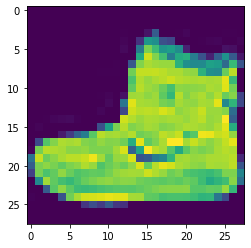

In [21]:
import numpy as np
np.set_printoptions(linewidth=200)

import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [ ]:
'''
You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:
'''


In [22]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [23]:
#Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them.

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
    ])

In [24]:
model.compile(
    tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4995 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3775 - accuracy: 0.8640
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3364 - accuracy: 0.8784
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3131 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2947 - accuracy: 0.8910


In [25]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3571 - accuracy: 0.8721


[0.35707491636276245, 0.8720999956130981]

In [26]:
classifications = model.predict(test_images)
print(classifications[0])

[6.8500526e-06 3.2922290e-11 1.9015948e-07 9.6110373e-09 3.7675015e-08 5.8043934e-03 1.2161959e-05 1.6546274e-03 7.8918731e-07 9.9252093e-01]


In [27]:
print(test_labels[0])

9
